In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#loading the text file, giving it column names and not loading the date

netflix_dataset=pd.read_csv('combined_data_1.txt', header=None, names=['Cust_Id', 'Rating'], usecols=[0,1])

In [4]:
netflix_dataset.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [5]:
netflix_dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [6]:
netflix_dataset['Rating'] = netflix_dataset['Rating'].astype(float)

In [7]:
netflix_dataset.shape

(24058263, 2)

In [8]:
# To find out how many people have rated the movies as 1, 2, 3, 4, 5 stars
stars = netflix_dataset.groupby('Rating')['Rating'].agg(['count']) 

In [9]:
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [10]:
movie_count=netflix_dataset.isnull().sum()
movie_count

Cust_Id       0
Rating     4499
dtype: int64

In [11]:
movie_count=netflix_dataset.isnull().sum()[1]
movie_count

4499

In [12]:
#get the customer count with NaN values
customer_count = netflix_dataset['Cust_Id'].nunique()

In [13]:
customer_count

475257

In [14]:
#without NaN values
customer_count=netflix_dataset['Cust_Id'].nunique()-movie_count
customer_count

470758

In [15]:
#get the total number of ratings given by the customers
rating_count=netflix_dataset['Cust_Id'].count()-movie_count
rating_count

24053764

In [16]:
#get the total number of ratings given by the customers
rating_count=netflix_dataset['Cust_Id'].count()-movie_count
rating_count

24053764

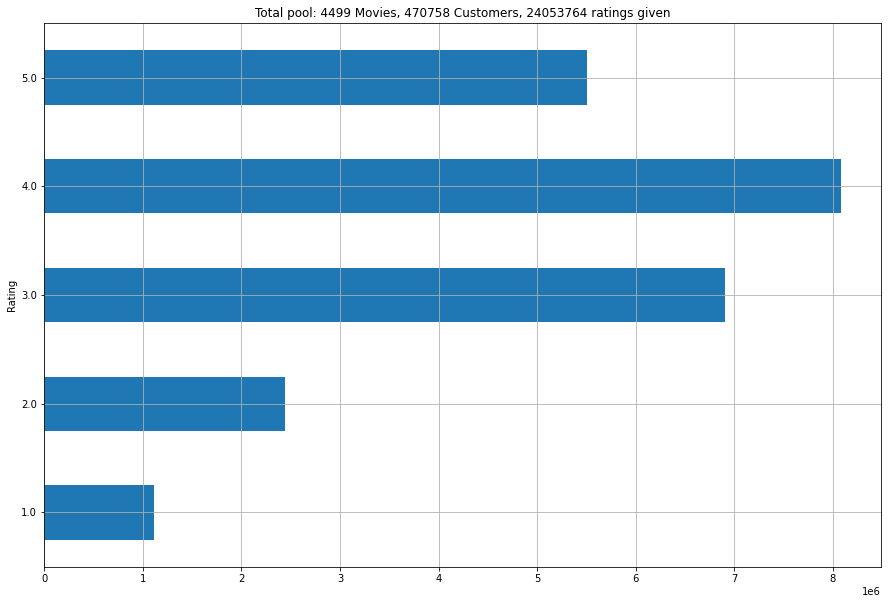

In [17]:
ax=stars.plot(kind='barh', legend=False, figsize=(15,10))
plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} ratings given')
plt.grid(True)

In [18]:
df_nan=pd.DataFrame(pd.isnull(netflix_dataset.Rating))

In [19]:
df_nan.head()

,Rating
0,True
1,False
2,False
3,False
4,False


In [20]:
df_nan=df_nan[df_nan['Rating']==True]

In [21]:
df_nan.shape

(4499, 1)

In [22]:
df_nan.head()

,Rating
0,True
548,True
694,True
2707,True
2850,True


In [23]:
#now we will reset the index as the column

df_nan=df_nan.reset_index()

In [24]:
df_nan.head()

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True


In [25]:
#now we will create a numpy array that will contain 1 from values 0 to 547
#2 from 548 to 693 and so on

movie_np=[]
movie_id=1
for i, j in zip(df_nan['index'][1:], df_nan['index'][:-1]):
    temp=np.full((1, i-j-1), movie_id)
    movie_np=np.append(movie_np, temp)
    movie_id+=1
    
    
#account for last record and corresponding Length

last_record=np.full((1, len(netflix_dataset)-df_nan.iloc[-1, 0]-1), movie_id)
movie_np=np.append(movie_np, last_record)
print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [26]:
#working
x = zip(df_nan['index'][1:], df_nan['index'][:-1])

In [27]:
tuple(x)

((548, 0),
 (694, 548),
 (2707, 694),
 (2850, 2707),
 (3991, 2850),
 (5011, 3991),
 (5105, 5011),
 (20016, 5105),
 (20112, 20016),
 (20362, 20112),
 (20561, 20362),
 (21108, 20561),
 (21234, 21108),
 (21353, 21234),
 (21644, 21353),
 (24344, 21644),
 (31453, 24344),
 (42176, 31453),
 (42716, 42176),
 (42833, 42716),
 (43052, 42833),
 (43256, 43052),
 (43872, 43256),
 (45206, 43872),
 (46414, 45206),
 (52276, 46414),
 (52550, 52276),
 (92303, 52550),
 (92827, 92303),
 (211241, 92827),
 (211463, 211241),
 (213318, 211463),
 (220209, 213318),
 (220318, 220209),
 (221158, 220318),
 (222098, 221158),
 (222380, 222098),
 (223183, 222380),
 (223936, 223183),
 (224428, 223936),
 (224522, 224428),
 (224651, 224522),
 (224757, 224651),
 (233259, 224757),
 (235879, 233259),
 (242438, 235879),
 (244789, 242438),
 (248381, 244789),
 (248613, 248381),
 (248942, 248613),
 (249033, 248942),
 (254181, 249033),
 (254296, 254181),
 (254456, 254296),
 (256863, 254456),
 (258697, 256863),
 (262260, 258697)

In [28]:
temp=np.full((1,547), 1)

In [29]:
print(temp)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [30]:
netflix_dataset=netflix_dataset[pd.notnull(netflix_dataset['Rating'])]
netflix_dataset['Movie_Id']=movie_np.astype(int)
netflix_dataset['Cust_Id']=netflix_dataset['Cust_Id'].astype(int)
print("now the dataset willl look like: ")
netflix_dataset.head()

now the dataset willl look like: 


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [31]:
#now we will remove all the users that have rated less movies and 
#also all those movies that has been rated less in numbers

f = ['count', 'mean']

In [32]:
dataset_movie_summary=netflix_dataset.groupby('Movie_Id').agg(f)

In [33]:
dataset_movie_summary

Cust_Id               Rating          
           count          mean  count      mean
Movie_Id                                       
1            547  1.249876e+06    547  3.749543
2            145  1.341926e+06    145  3.558621
3           2012  1.324290e+06   2012  3.641153
4            142  1.402854e+06    142  2.739437
5           1140  1.302384e+06   1140  3.919298
...          ...           ...    ...       ...
4495         614  1.321093e+06    614  3.478827
4496        9519  1.332006e+06   9519  3.763000
4497         714  1.330543e+06    714  2.715686
4498         269  1.262035e+06    269  2.464684
4499         428  1.270551e+06    428  2.614486

[4499 rows x 4 columns]

In [34]:
dataset_movie_summary=netflix_dataset.groupby('Movie_Id')['Rating'].agg(f)

In [35]:
dataset_movie_summary

,count,mean
Movie_Id,,
1,547,3.749543
2,145,3.558621
3,2012,3.641153
4,142,2.739437
5,1140,3.919298
...,...,...
4495,614,3.478827
4496,9519,3.763000
4497,714,2.715686


In [36]:
#now we will store all the movie_id indexes in a variable dataset_movie_compoany.index
dataset_movie_summary.index=dataset_movie_summary.index.map(int)

In [37]:
#now we will create a benchmark
movie_benchmark=round(dataset_movie_summary['count'].quantile(0.7),0)
movie_benchmark

1799.0

In [38]:
dataset_movie_summary['count']

Movie_Id
1        547
2        145
3       2012
4        142
5       1140
        ... 
4495     614
4496    9519
4497     714
4498     269
4499     428
Name: count, Length: 4499, dtype: int64

In [39]:
drop_movie_list=dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index
drop_movie_list

Int64Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
            ...
            4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
           dtype='int64', name='Movie_Id', length=3149)

In [40]:
dataset_cust_summary=netflix_dataset.groupby('Cust_Id')['Rating'].agg(f)
dataset_cust_summary

,count,mean
Cust_Id,,
6,153,3.333333
7,195,4.066667
8,21,4.000000
10,49,3.346939
25,4,3.500000
...,...,...
2649404,12,4.083333
2649409,10,4.000000
2649421,3,5.000000


In [41]:
dataset_cust_summary.index=dataset_cust_summary.index.map(int)


In [42]:
cust_benchmark=round(dataset_cust_summary['count'].quantile(0.7),0)
cust_benchmark

52.0

In [43]:
drop_cust_list=dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

Int64Index([      8,      10,      25,      33,      42,      59,      83,
                 87,      94,     116,
            ...
            2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401,
            2649404, 2649409, 2649421],
           dtype='int64', name='Cust_Id', length=327300)

In [44]:
#we will now remove all the customers and movies that are below our benchmark
print('the original dataframe has:', netflix_dataset.shape, 'shape')

the original dataframe has: (24053764, 3) shape


In [45]:
#trimming the dataset with ~

netflix_dataset=netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)]
netflix_dataset=netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]
print('After the triming, the shape is: {}'.format(netflix_dataset.shape))

After the triming, the shape is: (17337458, 3)


In [47]:
netflix_dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [49]:
#now we will prepare the dataset for SVD and it takes the matrix as the input
#so for input, we will convert the datset into a sparse matrix

df_p = pd.pivot_table(netflix_dataset, values='Rating', index='Cust_Id', columns='Movie_Id')
print(df_p.shape)

(143458, 1350)


In [53]:
df_p.head()

Movie_Id,3,8,16,17,18,26,28,30,32,33,...,4472,4474,4478,4479,4485,4488,4490,4492,4493,4496
Cust_Id,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,5.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,...,3.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df_title=pd.read_csv('movie_titles.csv', encoding='ISO-8859-1', header=None, names=['Movie_Id', 'Year', 'Name'])
df_title.set_index('Movie_Id', inplace=True)

In [58]:
df_title.head(10)

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
6,1997.0,Sick
7,1992.0,8 Man
8,2004.0,What the #$*! Do We Know!?
9,1991.0,Class of Nuke 'Em High 2


In [61]:
#building the model
import math
import re
from scipy.sparse import csr_matrix
import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [62]:
#help us to read the ddataset for SVD algorithm
reader=Reader()

In [63]:
#we only work with top 100k rows for quick runtime
data=Dataset.load_from_df(netflix_dataset[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader)

In [65]:
svd=SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=4, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 4 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Mean    Std     
RMSE (testset)    0.9937  0.9929  0.9990  0.9999  0.9964  0.0031  
MAE (testset)     0.7984  0.7988  0.8002  0.7896  0.7968  0.0042  
Fit time          4.66    4.59    4.63    4.63    4.63    0.03    
Test time         0.16    0.17    0.17    0.18    0.17    0.01    


{'test_rmse': array([0.99366698, 0.99288203, 0.99896819, 0.99993431]),
 'test_mae': array([0.79839894, 0.79881848, 0.80015731, 0.78962661]),
 'fit_time': (4.659284830093384,
  4.58554482460022,
  4.632697820663452,
  4.632055997848511),
 'test_time': (0.16351985931396484,
  0.1693277359008789,
  0.16585302352905273,
  0.17714500427246094)}

In [66]:
#so now we take user and we try to recommend some movies based on the past data

dataset_712664=netflix_dataset[(netflix_dataset['Cust_Id'] == 712664) & (netflix_dataset['Rating']==5)]
dataset_712664.set_index('Movie_Id', inplace=True)
dataset_712664=dataset_712664.join(df_title)['Name']
dataset_712664

Movie_Id
3                       Character
79                    The Killing
175                Reservoir Dogs
199               The Deer Hunter
241            North by Northwest
                  ...            
3887    Aguirre: The Wrath of God
4109              American Psycho
4266    The Passion of the Christ
4384             Dawn of the Dead
4392             Army of Darkness
Name: Name, Length: 84, dtype: object

In [67]:
#now we will build the recomendation algorithm
#first we will make a shallow copy of the movie_titles.csv file

user_712664=df_title.copy()
user_712664

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [68]:
user_712664=user_712664.reset_index()
user_712664

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [71]:
user_712664=user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]
user_712664

,Movie_Id,Year,Name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [74]:
#now we will train our algorithm with the whole dataset
data = Dataset.load_from_df(netflix_dataset[['Cust_Id', 'Movie_Id', 'Rating']], reader)


In [ ]:
#building the trainings set using suprise package
trainset=data.build_full_trainset()
svd.fit(trainset)

In [ ]:
user_712664['Estimate_Score']=user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)
user_712664=user_712664.drop('Movie_Id', axis=1)

In [ ]:
user_712664=user_712664.sort_values('Estimated_Score')
print(user_712664.head(10))

In [ ]:
user_712664=user_712664.sort_values('Estimated_Score', ascending=False)
print(user_712664.head(10))